In [95]:
cd F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R\

F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R


In [96]:
import sys

import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np

import pandas as pd
import anndata
from scipy import sparse
    
scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo')
# cr.settings.verbosity = 2

import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)


sc.settings.figdir = './figures-cellRank'

In [97]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)

In [156]:
adata = sc.read('Hu_sgn_python.h5ad')

In [157]:
adata

AnnData object with n_obs × n_vars = 143 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [158]:
counts = adata.obs['celltype'].values.describe()
counts

,counts,freqs
categories,,
Type_I,78,0.545455
Type_II,65,0.454545


In [159]:
counts = adata.obs['subtype'].values.describe()
counts

,counts,freqs
categories,,
Type_IA/B,64,0.447552
Type_II_intermediate,35,0.244755
Type_II,30,0.209790
Type_IC,14,0.097902


In [160]:
adata.obs['subtype'].values.describe()

,counts,freqs
categories,,
Type_IA/B,64,0.447552
Type_II_intermediate,35,0.244755
Type_II,30,0.209790
Type_IC,14,0.097902


In [161]:
# Python packages
import scanpy as sc
import scvi
import bbknn
import scib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
adata.obs['orig.ident']

Human_23W_AACAAGCCATTATGAC-1    HU_23W
Human_23W_ACGACTTAGTATCGCG-1    HU_23W
Human_23W_AGTTGCAGTTAGCAGC-1    HU_23W
Human_23W_CAAGCTAGTTGCATCT-1    HU_23W
Human_23W_CATAATCCATGTCGCG-1    HU_23W
                                 ...  
Human_26W_TGATCTTGTATGTCAC-1    HU_26W
Human_26W_TGATTTCGTGAGTCAG-1    HU_26W
Human_26W_TGCATCCCAAAGTGTA-1    HU_26W
Human_26W_TTACCGCGTGCCTTCT-1    HU_26W
Human_26W_TTTCACACAAGCACAG-1    HU_26W
Name: orig.ident, Length: 143, dtype: category
Categories (3, object): ['HU_23W', 'HU_25W', 'HU_26W']

In [176]:
label_key = "subtype"
batch_key = "orig.ident"

In [164]:
adata.obs[batch_key].value_counts()

orig.ident
HU_25W    90
HU_26W    44
HU_23W     9
Name: count, dtype: int64

In [165]:
adata

AnnData object with n_obs × n_vars = 143 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [166]:
sc.pp.filter_genes(adata, min_cells=1)
adata

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name', 'n_cells'
    obsm: 'X_pca', 'X_umap'

In [167]:
adata.X

<143x23135 sparse matrix of type '<class 'numpy.float64'>'
	with 711695 stored elements in Compressed Sparse Column format>

In [168]:
adata.layers["counts"] = adata.X.copy() 

In [169]:
adata.layers['counts']

<143x23135 sparse matrix of type '<class 'numpy.float64'>'
	with 711695 stored elements in Compressed Sparse Column format>

In [170]:
adata.X = adata.layers["counts"].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X.copy()

In [171]:
adata

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name', 'n_cells'
    uns: 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'logcounts'

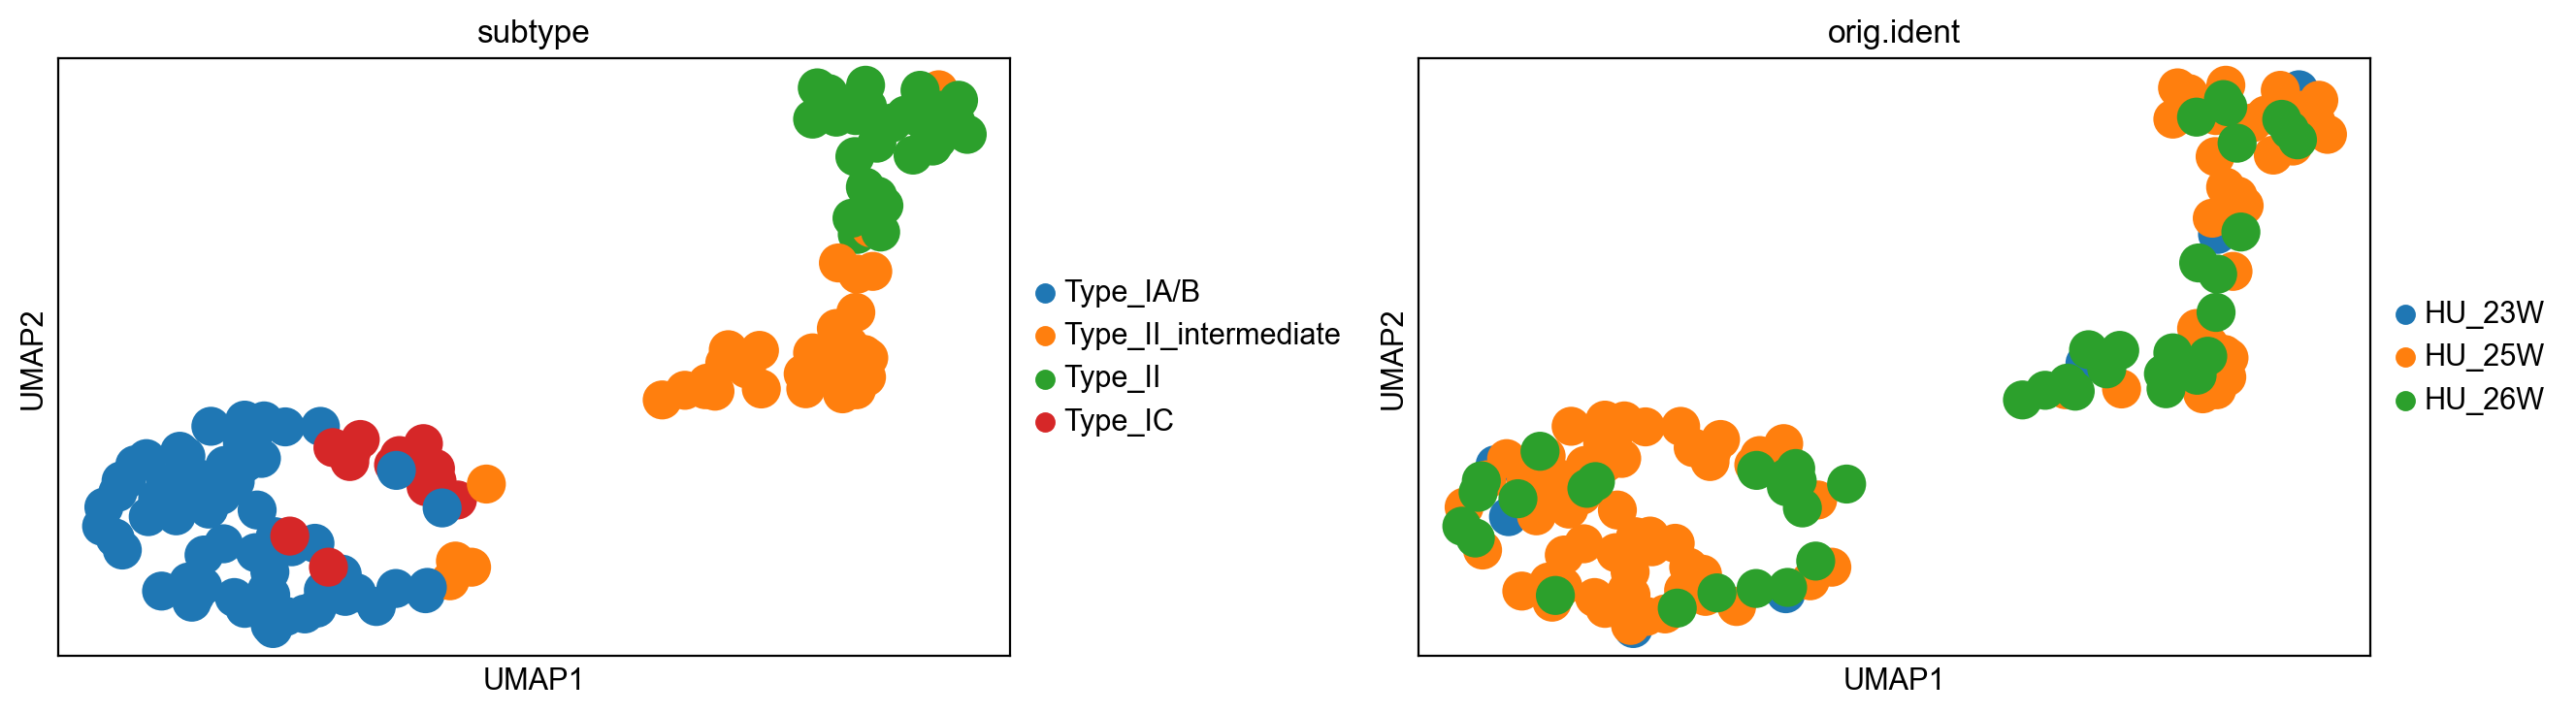

In [172]:
adata.uns[batch_key + "_colors"] = [
    "#1b9e77",
    
    "#7570b3",
]  # Set custom colours for batches
sc.pl.umap(adata, color=[label_key, batch_key], wspace=0.3)

In [177]:
sc.pp.highly_variable_genes(
    adata, n_top_genes=2000, batch_key=batch_key
)
adata
adata.var

,name,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
AL627309.1,AL627309.1,6,False,0.016753,-0.393122,-0.341624,0,False
AL627309.5,AL627309.5,16,False,0.066892,-0.009264,0.180031,0,False
AL669831.2,AL669831.2,1,False,0.002094,-0.189067,-0.342337,0,False
LINC01409,LINC01409,42,False,0.188345,-0.085971,-0.278692,0,False
FAM87B,FAM87B,1,False,0.002309,-0.156343,-0.297915,0,False
...,...,...,...,...,...,...,...,...
AL354822.1,AL354822.1,8,False,0.079774,-0.299222,-0.372237,0,False
AL592183.1,AL592183.1,68,False,0.434661,0.470476,-0.589816,0,False
AC240274.1,AC240274.1,8,False,0.047346,0.252005,0.534126,1,False
AC007325.4,AC007325.4,11,True,0.229567,1.722137,1.159289,2,False


In [178]:
n_batches = adata.var["highly_variable_nbatches"].value_counts()
n_batches

highly_variable_nbatches
0    17721
1     4743
2      625
3       46
Name: count, dtype: int64

In [179]:
adata_hvg = adata[:, adata.var["highly_variable"]].copy()
adata_hvg

AnnData object with n_obs × n_vars = 143 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'orig.ident_colors', 'subtype_colors', 'hvg'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'logcounts'

In [180]:
adata_scvi = adata_hvg.copy()

In [181]:
scvi.model.SCVI.setup_anndata(adata_scvi, layer="counts", batch_key=batch_key)
adata_scvi

INFO     Using batches from adata.obs["orig.ident"]                                                                
INFO     No label_key inputted, assuming all cells have same label                                                 
INFO     Using data from adata.layers["counts"]                                                                    
INFO     Successfully registered anndata object containing 143 cells, 2000 vars, 3 batches, 1 labels, and 0        
         proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.               
INFO     Please do not further modify adata until model is trained.                                                


AnnData object with n_obs × n_vars = 143 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2', '_scvi_batch', '_scvi_labels'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'orig.ident_colors', 'subtype_colors', 'hvg', '_scvi'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'logcounts'

In [182]:
model_scvi = scvi.model.SCVI(adata_scvi)
model_scvi

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [186]:
scvi.data.view_anndata_setup(model_scvi.adata)

Anndata setup with scvi-tools version 0.14.6.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │  143  │
│             Vars             │ 2000  │
│            Labels            │   1   │
│           Batches            │   3   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   0   │
└──────────────────────────────┴───────┘

             SCVI Data Registry              
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │  adata.layers['counts']   │
│ batch_indices │ adata.obs['_scvi_batch']  │
│    labels     │ adata.obs['_scvi_labels'] │
└───────────────┴───────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                       Batch Categories                       
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['orig.ident'] │   HU_23W   │          0          │
│                         │   HU_25W   │          1          │
│                         │   HU_26W   │          2          │
└─────────────────────────┴────────────┴─────────────────────┘

In [188]:
max_epochs_scvi = np.min([round((20000 / adata.n_obs) * 400), 400])
max_epochs_scvi

400

In [189]:
model_scvi.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 400/400: 100%|█████████████████████████████████████████| 400/400 [00:13<00:00, 29.75it/s, loss=1.25e+03, v_num=1]


In [190]:
adata_scvi.obsm["X_scVI"] = model_scvi.get_latent_representation()

In [251]:
sc.pp.neighbors(adata_scvi, use_rep="X_scVI",n_neighbors=25)
sc.tl.umap(adata_scvi,min_dist=0.6)
sc.tl.leiden(adata_scvi,resolution=1,key_added='clusters')
adata_scvi

AnnData object with n_obs × n_vars = 143 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2', '_scvi_batch', '_scvi_labels', 'clusters'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'orig.ident_colors', 'subtype_colors', 'hvg', '_scvi', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'X_scVI'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

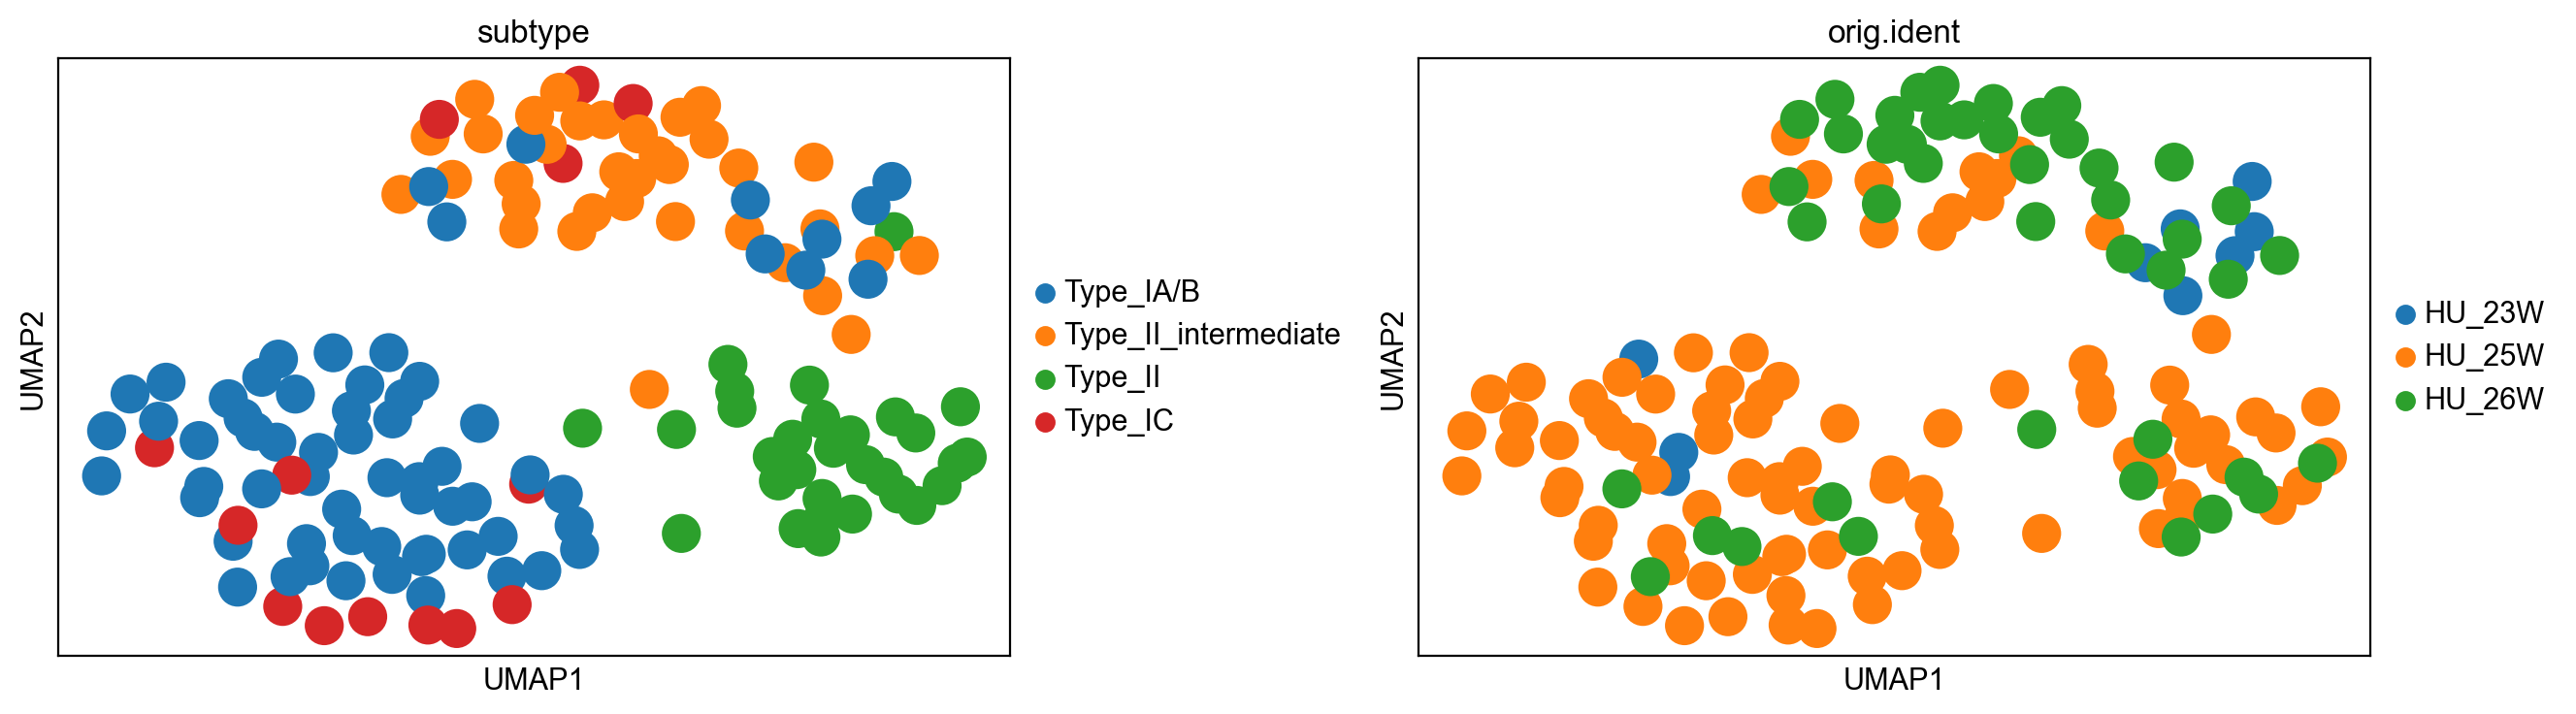

In [252]:
sc.pl.umap(adata_scvi, color=[label_key, batch_key], wspace=0.3)

In [255]:
adata_scvi

AnnData object with n_obs × n_vars = 143 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2', '_scvi_batch', '_scvi_labels', 'clusters'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'orig.ident_colors', 'subtype_colors', 'hvg', '_scvi', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'X_scVI'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [265]:
pd.DataFrame(adata_scvi.obsm["X_scVI"]).to_csv('human_sgn_scVI.csv')